In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("cardata.csv")

In [3]:
print(df.head())
print(df.info())
print(df.describe())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [4]:
df['Current_Year'] = 2020
df['Car_Age'] = df['Current_Year'] - df['Year']
df.drop(['Year', 'Car_Name', 'Current_Year'], axis=1, inplace=True)

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [9]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [10]:
#Evaluation

print("Linear Regression R2 Score:", r2_score(y_test, lr_preds))
print("Random Forest R2 Score:", r2_score(y_test, rf_preds))

Linear Regression R2 Score: 0.8488707839193155
Random Forest R2 Score: 0.9583537507483193


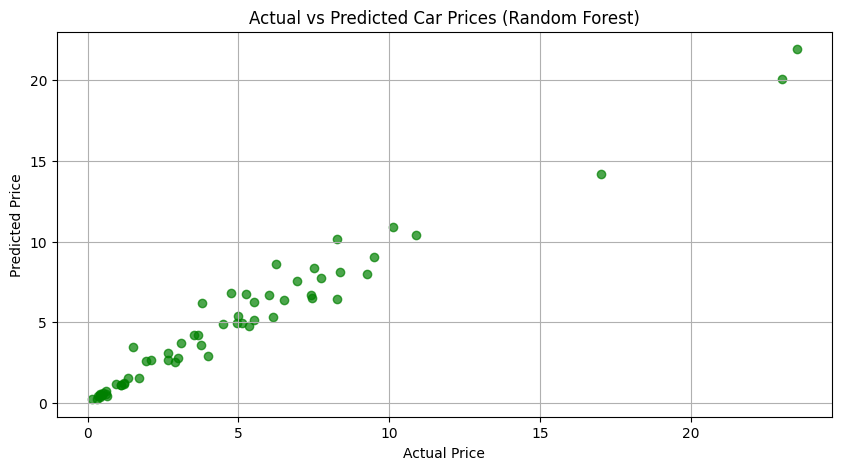

In [11]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.scatter(y_test, rf_preds, alpha=0.7, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Random Forest)")
plt.grid(True)
plt.show()